In [6]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import pickle
from create_stamps import CreateStamps
from create_stamps import CNNFilter
from create_stamps import VisualizeResults
from create_stamps import load_stamps
from run_search import run_search

%matplotlib inline

# Setup file paths and run the KBMOD GPU Search

In [2]:
pgNum = 296
ccdNum = 28
im_filepath = "/epyc/users/smotherh/" + "good_warps_good_seeing/{:03}/{:02}".format(pgNum, ccdNum)
res_filepath = "/epyc/users/smotherh/DECAM_Data_Reduction/" + "kbmod_results/{:03}/{:02}".format(
    pgNum, ccdNum
)
time_file = "/epyc/users/smotherh/DECAM_Data_Reduction/" + "loriallen_times.dat"

results_suffix = "DEMO"
v_min = 270  # Pixels/day
v_max = 320.0
# Offset by PI for prograde orbits in lori allen data
ang_below = -np.pi + np.pi / 10.0  # Angle below ecliptic
ang_above = np.pi + np.pi / 10.0  # Angle above ecliptic
v_steps = 64
ang_steps = 32

v_arr = [v_min, v_max, v_steps]
ang_arr = [ang_below, ang_above, ang_steps]

num_obs = 15

input_parameters = {
    # Required
    "im_filepath": im_filepath,
    "res_filepath": res_filepath,
    "time_file": time_file,
    "output_suffix": results_suffix,
    "v_arr": v_arr,
    "ang_arr": ang_arr,
    # Important
    "num_obs": num_obs,
    "do_mask": True,
    "lh_level": 10.0,
    "gpu_filter": True,
    # Fine tuning
    "sigmaG_lims": [15, 60],
    "mom_lims": [37.5, 37.5, 1.5, 1.0, 1.0],
    "peak_offset": [3.0, 3.0],
    "chunk_size": 1000000,
    "stamp_type": "cpp_median",
    "eps": 0.03,
    "clip_negative": True,
    "mask_num_images": 10,
    "sigmaG_filter_type": "lh",
}

rs = run_search(input_parameters)
rs.run_search()

---------------------------------------
Loading Images
---------------------------------------
Loaded 20 images
Times set
Starting Search
---------------------------------------
Ecliptic Angle = 1.1887
Min. Search Angle = 4.0162
Max Search Angle = 4.6445
Min Velocity = 270.0000
Max Velocity = 320.0000
Using in-line GPU filtering methods
sigmaG limits: [15,60]
sigmaG coeff: 0.7753
Search finished in 23.508s
---------------------------------------
Retrieving Results
---------------------------------------
Getting results...
---------------------------------------
Chunk Start = 0
Chunk Max Likelihood = 47.84
Chunk Min. Likelihood = 8.00
---------------------------------------
Applying Clipped-sigmaG Filtering
sigmaG limits: [15,60]
sigmaG coeff: 0.7753
Starting pooling...
0.63s elapsed
Completed filtering.
---------------------------------------
Keeping 3402 results
Keeping 3402 of 8507 total results
---------------------------------------
Applying Stamp Filtering
------------------------

# Use the VisualizeResults class to see the results from the search
This class expects the CNN named `resnet_2.h5` to be in the same directory, but can be remapped with `cnn_path='path-to-cnn'`

In [3]:
vis_results = VisualizeResults(
    "/epyc/users/smotherh/DECAM_Data_Reduction/kbmod_results/{0:03}/{1:02d}/",
    "/epyc/projects2/smotherh/DECAM_Data_Reduction/pointing_groups_hyak/Pointing_Group_{0:03}/warps/{1:02d}/",
)

# Look at the coadded stamps for this ccd

Center filtering keeps 3 out of 3 stamps.


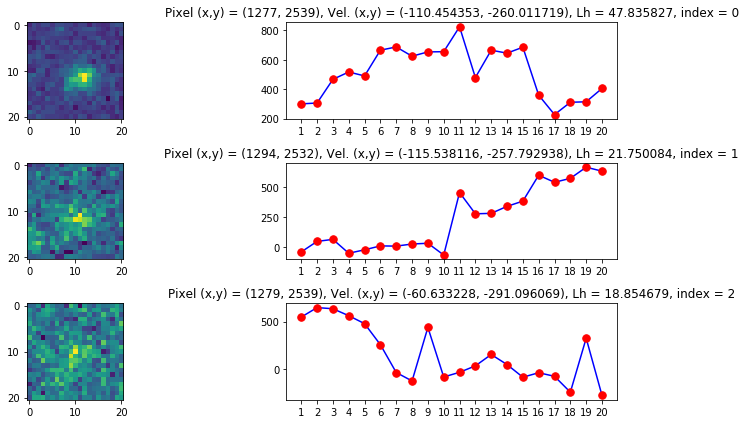

In [4]:
_ = vis_results.show_pg_results(
    296, 28, cutoff=0.75, lh_lim=15, suffix="DEMO", plot_stamps="coadd", use_widget=False
)

# Look at all the stamps for this ccd

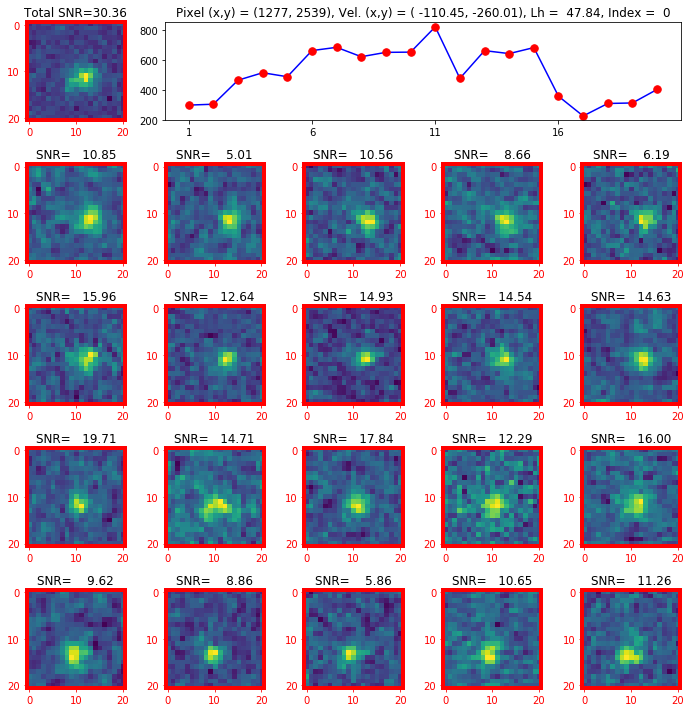

In [5]:
_ = vis_results.show_pg_results(
    296, 28, cutoff=0.75, lh_lim=15, suffix="DEMO", plot_stamps="all", use_widget=True
)